Title of Project

HAND WRITEN DIGIT CLASSIFICATION

To develop a machine learning model capable of accurately classifying handwritten digits (0–9) from images. The project aims to leverage techniques in computer vision and deep learning to enable applications in automated digit recognition, such as postal code reading, bank check processing, and digital form transcription.

**Data Source**-  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Import DataSet

In [ ]:
from sklearn.datasets  import load_digits


In [ ]:
df=load_digits()


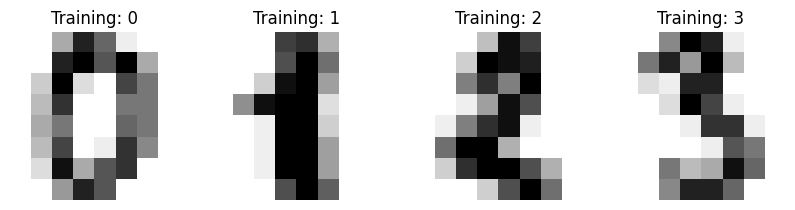

In [ ]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  ax.set_title('Training: %i' % label)



DATA PREPROCESSING

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

Scaling Image Data


In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16

In [ ]:
data.min()


0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

TRAIN TEST SPLIT DATA


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [ ]:
#RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#predict TEST data
y_predict=rf.predict(X_test)

In [ ]:
y_predict

array([1, 9, 5, 7, 3, 7, 1, 4, 1, 1, 7, 3, 9, 1, 8, 0, 4, 5, 6, 9, 1, 1,
       5, 2, 7, 9, 0, 4, 5, 3, 0, 2, 7, 6, 8, 7, 0, 1, 4, 5, 0, 6, 4, 6,
       1, 2, 0, 6, 5, 5, 2, 6, 0, 8, 5, 6, 6, 1, 5, 6, 9, 5, 6, 6, 6, 1,
       7, 1, 2, 1, 6, 5, 4, 9, 3, 3, 6, 7, 1, 3, 9, 3, 9, 4, 7, 4, 7, 8,
       8, 9, 6, 5, 0, 5, 8, 6, 8, 4, 5, 6, 9, 0, 2, 6, 4, 5, 3, 9, 5, 8,
       6, 0, 1, 0, 4, 2, 7, 9, 6, 9, 7, 9, 1, 9, 4, 3, 5, 7, 4, 3, 1, 6,
       6, 6, 5, 4, 2, 7, 2, 9, 3, 5, 5, 9, 0, 8, 1, 8, 4, 6, 0, 3, 0, 7,
       5, 4, 9, 2, 7, 9, 1, 0, 2, 3, 6, 6, 0, 0, 7, 6, 6, 9, 8, 8, 0, 4,
       3, 7, 2, 0, 5, 3, 6, 2, 7, 5, 7, 9, 8, 2, 6, 6, 6, 2, 7, 4, 6, 6,
       0, 2, 3, 9, 5, 7, 2, 6, 7, 1, 5, 8, 7, 4, 4, 5, 6, 4, 9, 4, 8, 0,
       8, 8, 9, 4, 6, 2, 4, 5, 8, 3, 2, 3, 8, 9, 3, 1, 7, 3, 7, 0, 4, 5,
       7, 7, 8, 2, 5, 5, 8, 9, 0, 3, 0, 1, 6, 1, 5, 9, 3, 4, 0, 6, 4, 6,
       9, 5, 3, 4, 1, 5, 6, 4, 2, 1, 4, 6, 9, 7, 8, 1, 9, 7, 1, 9, 6, 8,
       2, 4, 6, 5, 9, 6, 2, 1, 4, 6, 2, 4, 3, 5, 8,

In [ ]:
#MODEL ACCURACY
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_predict)


array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  1, 57,  0,  0,  0,  2],
       [ 1,  0,  0,  0,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  2,  0,  0,  0,  2,  1,  0, 47,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 55]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       0.97      1.00      0.98        59
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        48
           4       0.98      0.96      0.97        57
           5       0.93      0.95      0.94        60
           6       0.98      0.98      0.98        65
           7       1.00      1.00      1.00        55
           8       1.00      0.90      0.95        52
           9       0.93      0.98      0.96        56

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



WE CAN APPLY LOGISTICREGRESSIO ALSO


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))  # Flatten images
y = digits.target


In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Check test accuracy
y_pred = model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.9685185185185186


MAKE PREDICTION ON DATA SET


In [ ]:
 #Predict labels for test data
y_test_pred = model.predict(X_test)

# Print a few predictions
print("Predicted labels:", y_test_pred[:10])
print("Actual labels:   ", y_test[:10])

Predicted labels: [6 9 3 7 2 1 5 2 5 2]
Actual labels:    [6 9 3 7 2 1 5 2 5 2]


Visualize Predictions You can visualize the test images alongside the predicted and actual labels:

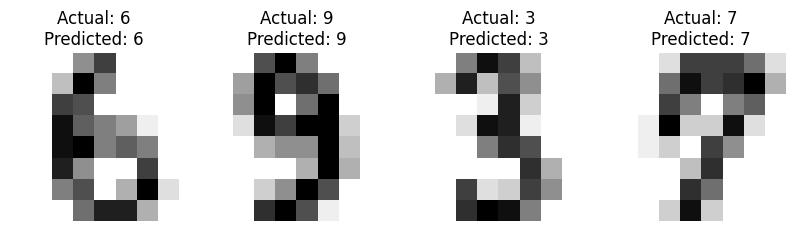

In [ ]:
import matplotlib.pyplot as plt

# Visualize some predictions
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, actual, pred in zip(axes, X_test[:4], y_test[:4], y_test_pred[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Actual: {actual}\nPredicted: {pred}")


End-to-End Workflow Summary
1.Load and preprocess data.
2. Train a machine learning model (e.g., Logistic Regression, Random Forest, or CNN).
3.Make predictions on test data and evaluate model accuracy.
Predict labels for new, unseen data after preprocessing it appropriately.